#  Demo usage of empirical IA modeling kernels

This notebook shows how to use the numpy kernels implemented in `ia_kernels`. These kernels have nothing to do at all with the actual modeling side of the IA--halo connection. The only thing these kernels do is handle the ndarray gymnastics of 3d rotation matrices, and using this machinery to generate Monte Carlo realizations of correlated 3d directions. 

The most important function is `axes_correlated_with_input_vector`. This function accepts two inputs: 1. a preferred direction in space called $e_{\rm halo},$ which is usually something like the principal eigenvector of halo shape or large-scale tidal tensor, 2. correlation strength, $p,$ which can take any value. 

The first half of this notebook demonstrates how to use the `axes_correlated_with_input_vector` function to generate a principal axis for the galaxies, and illustrates how the correlation strength manifests in the distribution of correlation angles. The second half of the notebook shows how to use the additiona functions in `ia_kernels` to generate a full orthonormal basis for the model galaxies (as opposed to just a single principal eigenvector). 

In [1]:
%matplotlib inline
import numpy as np 

In [2]:
import ia_kernels
__=reload(ia_kernels)

# Demo non-random unit vector drawing

In [3]:
N = 1000
unit_z = np.random.random((N,3))*0.00001
unit_z[:,2] = 1.0 

In [26]:
p = np.zeros(N)-50
ran_vectors_1 = ia_kernels.axes_correlated_with_input_vector(unit_z, p=p)

p = np.zeros(N)-10
ran_vectors_2 = ia_kernels.axes_correlated_with_input_vector(unit_z, p=p)

p = np.zeros(N)
ran_vectors_3 = ia_kernels.axes_correlated_with_input_vector(unit_z, p=p)

p = np.zeros(N)+10
ran_vectors_4 = ia_kernels.axes_correlated_with_input_vector(unit_z, p=p)

p = np.zeros(N)+50
ran_vectors_5 = ia_kernels.axes_correlated_with_input_vector(unit_z, p=p)

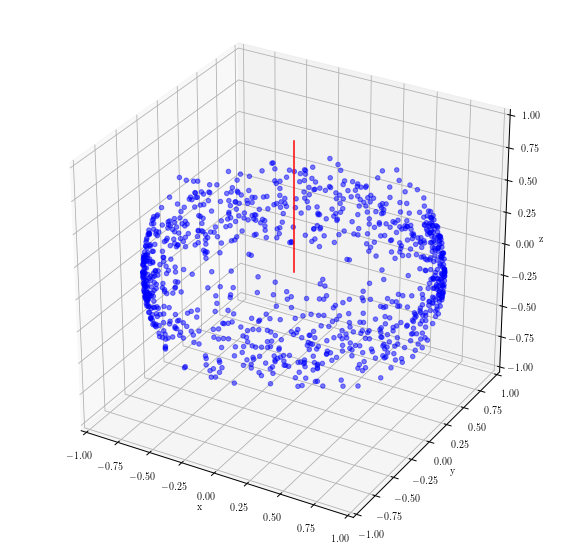

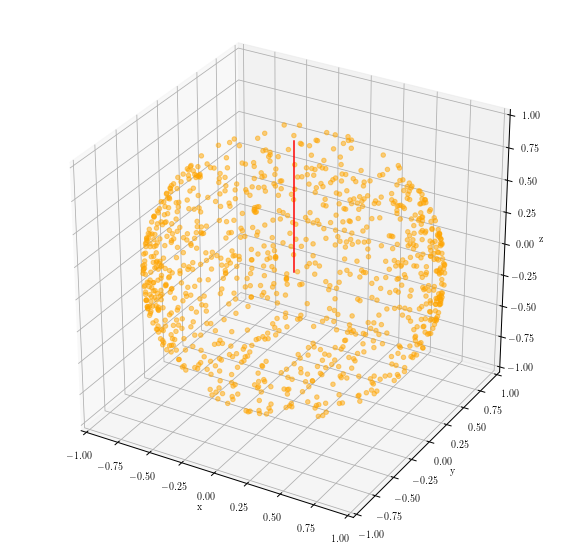

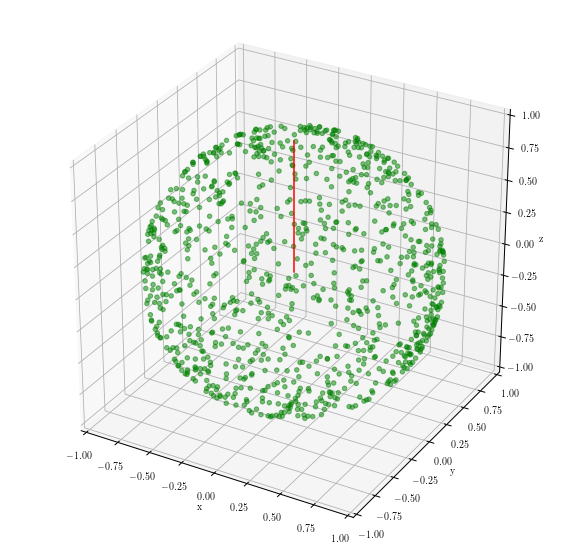

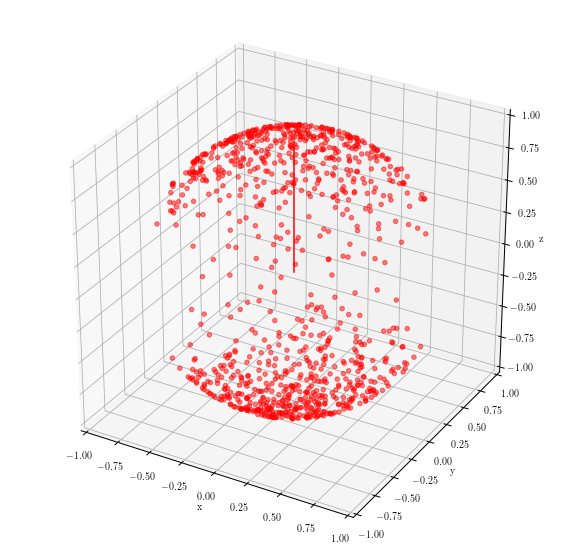

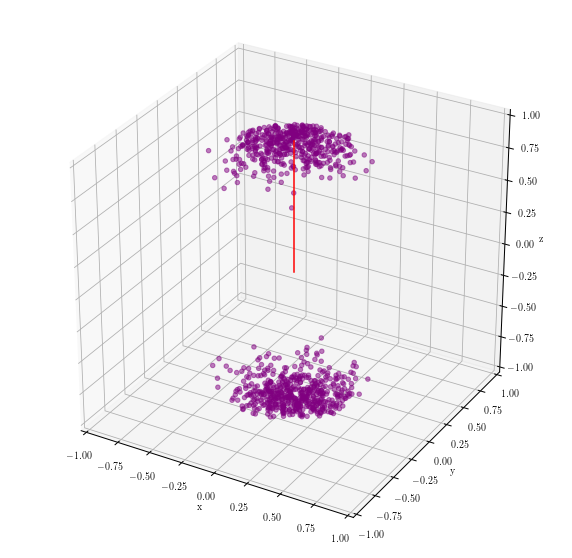

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,0],[0,0],[0,1], color='red')
ax.scatter(ran_vectors_1[:,0], ran_vectors_1[:,1], -1.0*ran_vectors_1[:,2], alpha=0.5, color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
plt.show()
fig.savefig('/Users/duncan/Desktop/sphere_1.png')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,0],[0,0],[0,1], color='red')
ax.scatter(ran_vectors_2[:,0], ran_vectors_2[:,1], -1.0*ran_vectors_2[:,2], alpha=0.5, color='orange')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
plt.show()
fig.savefig('/Users/duncan/Desktop/sphere_2.png')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,0],[0,0],[0,1], color='red')
ax.scatter(ran_vectors_3[:,0], ran_vectors_3[:,1], -1.0*ran_vectors_3[:,2], alpha=0.5, color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
plt.show()
fig.savefig('/Users/duncan/Desktop/sphere_3.png')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,0],[0,0],[0,1], color='red')
ax.scatter(ran_vectors_4[:,0], ran_vectors_4[:,1], -1.0*ran_vectors_4[:,2], alpha=0.5, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
plt.show()
fig.savefig('/Users/duncan/Desktop/sphere_4.png')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,0],[0,0],[0,1], color='red')
ax.scatter(ran_vectors_5[:,0], ran_vectors_5[:,1], -1.0*ran_vectors_5[:,2], alpha=0.5, color='purple')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
plt.show()
fig.savefig('/Users/duncan/Desktop/sphere_5.png')

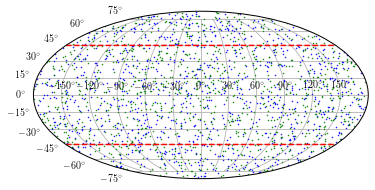

In [6]:
# show projection of misalignment angles

v1 = np.zeros((N,3))
v1[:,2] = 1.0
theta_1 = ia_kernels.angles_between_list_of_vectors(v1,ran_vectors_1) - np.pi/2
theta_2 = ia_kernels.angles_between_list_of_vectors(v1,ran_vectors_2) - np.pi/2
phi = np.random.random(N)*2*np.pi - np.pi

x = np.linspace(-np.pi,np.pi,100)
y = x*0.0 + np.pi/4

plt.figure()
plt.subplot(111, projection="mollweide")
plt.grid(True)
plt.plot(phi, theta_1, '.', color='blue', ms=1)
plt.plot(phi, theta_2, '.', color='green', ms=1)
plt.plot(x,y,'--',color='red')
plt.plot(x,-1.0*y,'--',color='red')
plt.xtick_labels = []

### Generate 3d vectors with directions correlated with $e_{\rm halo}$

In [13]:
npts = int(1e5)

#  Choose some unit-vector defining the underlying orientation angle
e_halo = ia_kernels.normalized_vectors(np.random.random((npts, 3)))

#  Pick a handful of correlation strengths
a1, a2, a3, a4, a5 = -50, -10, 0, 10, 50

#  Generate a galaxy orientation for each chosen correlation strength
p1 = np.zeros(npts) + a1
correlated_e1_p1 = ia_kernels.axes_correlated_with_input_vector(e_halo, p1, seed=43)

p2 = np.zeros(npts) + a2
correlated_e1_p2 = ia_kernels.axes_correlated_with_input_vector(e_halo, p2, seed=43)

p3 = np.zeros(npts) + a3
correlated_e1_p3 = ia_kernels.axes_correlated_with_input_vector(e_halo, p3, seed=43)

p4 = np.zeros(npts) + a4
correlated_e1_p4 = ia_kernels.axes_correlated_with_input_vector(e_halo, p4, seed=43)

p5 = np.zeros(npts) + a5
correlated_e1_p5 = ia_kernels.axes_correlated_with_input_vector(e_halo, p5, seed=43)


### Compute angles between vectors and plot

For each model, compute the relative angle between $e_{\rm halo}$ and the galaxy principal axis

In [14]:
angles1 = ia_kernels.angles_between_list_of_vectors(e_halo, correlated_e1_p1)
angles2 = ia_kernels.angles_between_list_of_vectors(e_halo, correlated_e1_p2)
angles3 = ia_kernels.angles_between_list_of_vectors(e_halo, correlated_e1_p3)
angles4 = ia_kernels.angles_between_list_of_vectors(e_halo, correlated_e1_p4)
angles5 = ia_kernels.angles_between_list_of_vectors(e_halo, correlated_e1_p5)

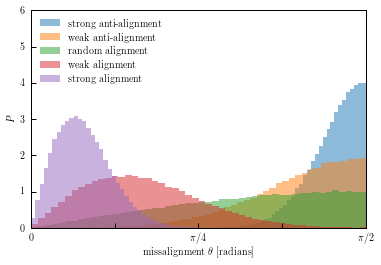

In [31]:
reflect = (angles1 > np.pi/2)
angles1[reflect] = np.pi/2 - (angles1[reflect]-np.pi/2.0)

reflect = (angles2 > np.pi/2)
angles2[reflect] = np.pi/2 - (angles2[reflect]-np.pi/2.0)

reflect = (angles3 > np.pi/2)
angles3[reflect] = np.pi/2 - (angles3[reflect]-np.pi/2.0)

reflect = (angles4 > np.pi/2)
angles4[reflect] = np.pi/2 - (angles4[reflect]-np.pi/2.0)

reflect = (angles5 > np.pi/2)
angles5[reflect] = np.pi/2 - (angles5[reflect]-np.pi/2.0)

fig, ax = plt.subplots(1, 1)

__=ax.hist(angles1, bins=50, normed=True, alpha=0.5, label=r'${\rm strong\ anti}$-${\rm alignment}$')
__=ax.hist(angles2, bins=50, normed=True, alpha=0.5, label=r'${\rm weak\ anti}$-${\rm alignment}$')
__=ax.hist(angles3, bins=50, normed=True, alpha=0.5, label=r'${\rm random\ alignment}$')
__=ax.hist(angles4, bins=50, normed=True, alpha=0.5, label=r'${\rm weak\ alignment}$')
__=ax.hist(angles5, bins=50, normed=True, alpha=0.5, label=r'${\rm strong\ alignment}$')

legend = ax.legend(frameon=False)
ylim = ax.set_ylim(0, 6)
xlabel = ax.set_xlabel(r'${\rm missalignment}~\theta \ [{\rm radians}]$')
ylabel = ax.set_ylabel(r'$P$')

#title = ax.set_title(r'${\rm empirical\ modeling\ intrinsic\ alignments}$')

xticks = ax.set_xticks(np.linspace(0,np.pi/2.0,5))
xticklabels = ['0', '', r'$\pi/4$', '', r'$\pi/2$']
ax.set_xticklabels(xticklabels)
ax.set_xlim([0,np.pi/2])

fig.savefig('/Users/duncan/Desktop/theta_dist.png')

(0.01, 100)

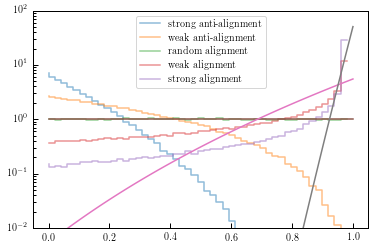

In [266]:
fig, ax = plt.subplots(1, 1)

bins = np.linspace(0,1,50)
counts = np.histogram(np.cos(angles1), bins=bins)[0]
counts = 1.0*counts/np.sum(counts)/np.diff(bins)
ax.step(bins[:-1], counts, alpha=0.5, label=r'${\rm strong\ anti}$-${\rm alignment}$')
counts = np.histogram(np.cos(angles2), bins=bins)[0]
counts = 1.0*counts/np.sum(counts)/np.diff(bins)
ax.step(bins[:-1], counts, alpha=0.5, label=r'${\rm weak\ anti}$-${\rm alignment}$')
counts = np.histogram(np.cos(angles3), bins=bins)[0]
counts = 1.0*counts/np.sum(counts)/np.diff(bins)
ax.step(bins[:-1], counts, alpha=0.5, label=r'${\rm random\ alignment}$')
counts = np.histogram(np.cos(angles4), bins=bins)[0]
counts = 1.0*counts/np.sum(counts)/np.diff(bins)
ax.step(bins[:-1], counts, alpha=0.5, label=r'${\rm weak\ alignment}$')
counts = np.histogram(np.cos(angles5), bins=bins)[0]
counts = 1.0*counts/np.sum(counts)/np.diff(bins)
ax.step(bins[:-1], counts, alpha=0.5, label=r'${\rm strong\ alignment}$')

x = np.linspace(0,1,100)
p = powerlaw.pdf(x, 1, scale=1, loc=0)
ax.plot(x,p)
p = powerlaw.pdf(x, 11, scale=2, loc=-1)
ax.plot(x,p)
p = powerlaw.pdf(x, 101, scale=2, loc=-1)
ax.plot(x,p)

legend = ax.legend()
ax.set_yscale('log')
ax.set_ylim([0.01,100])

#xticks = ax.set_xticks(np.linspace(0,np.pi/2.0,5))
#xticklabels = ['0', '', r'$\pi/4$', '', r'$\pi/2$']
#ax.set_xticklabels(xticklabels)

(0.01, 100)

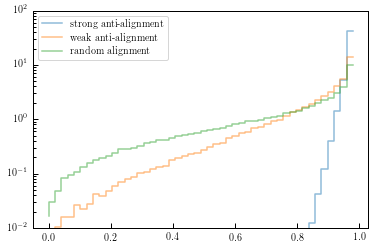

In [148]:
fig, ax = plt.subplots(1, 1)

bins = np.linspace(0,1,50)
counts = np.histogram(np.fabs(np.cos(angles4-np.pi/2)), bins=bins)[0]
counts = 1.0*counts/np.sum(counts)/np.diff(bins)
ax.step(bins[:-1], counts, alpha=0.5, label=r'${\rm strong\ anti}$-${\rm alignment}$')
counts = np.histogram(np.fabs(np.cos(angles1-np.pi/2)), bins=bins)[0]
counts = 1.0*counts/np.sum(counts)/np.diff(bins)
ax.step(bins[:-1], counts, alpha=0.5, label=r'${\rm weak\ anti}$-${\rm alignment}$')
counts = np.histogram(np.fabs(np.cos(angles2-np.pi/2)), bins=bins)[0]
counts = 1.0*counts/np.sum(counts)/np.diff(bins)
ax.step(bins[:-1], counts, alpha=0.5, label=r'${\rm random\ alignment}$')

legend = ax.legend()
ax.set_yscale('log')
ax.set_ylim([0.01,100])

#xticks = ax.set_xticks(np.linspace(0,np.pi/2.0,5))
#xticklabels = ['0', '', r'$\pi/4$', '', r'$\pi/2$']
#ax.set_xticklabels(xticklabels)

In [81]:
from scipy.stats import powerlaw

cos_t = np.cos(angles1)
print(powerlaw.fit(cos_t, fscale=2, floc=-1)[0]-1)
cos_t = np.cos(angles2)
print(powerlaw.fit(cos_t, fscale=2, floc=-1)[0]-1)
cos_t = np.cos(angles3)
print(powerlaw.fit(cos_t, fscale=2, floc=-1)[0]-1)
cos_t = np.cos(angles4)
print(powerlaw.fit(cos_t, fscale=2, floc=-1)[0]-1)
cos_t = np.cos(angles5)
print(powerlaw.fit(cos_t, fscale=2, floc=-1)[0]-1)

1.61904296875
2.24970703125
9.9736328125
0.69375
99.649609375


In [338]:
from scipy.stats import truncnorm

cos_t = np.cos(angles1)
print(truncnorm.fit(cos_t, fscale=2, floc=-1)[0]-1)
cos_t = np.cos(angles4)
print(truncnorm.fit(cos_t, fscale=2, floc=-1)[0]-1)
cos_t = np.cos(angles2)
print(truncnorm.fit(cos_t, fscale=2, floc=-1)[0]-1)

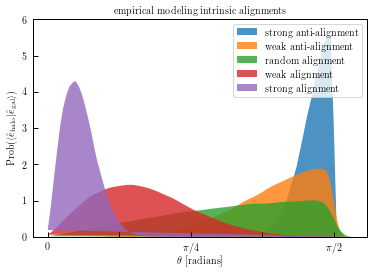

In [114]:
from scipy.stats import gaussian_kde
x = np.linspace(0, np.pi/2.+0.1, 100)

kde1 = gaussian_kde(angles1)
kde2 = gaussian_kde(angles2)
kde3 = gaussian_kde(angles3)
kde4 = gaussian_kde(angles4)
kde5 = gaussian_kde(angles5)


pdf1 = kde1.evaluate(x)
pdf2 = kde2.evaluate(x)
pdf3 = kde3.evaluate(x)
pdf4 = kde4.evaluate(x)
pdf5 = kde5.evaluate(x)

fig, ax = plt.subplots(1, 1)

__=ax.fill(x, pdf4, label=r'${\rm strong\ anti}$-${\rm alignment}$', alpha=0.8)
__=ax.fill(x, pdf1, label=r'${\rm weak\ anti}$-${\rm alignment}$', alpha=0.8)
__=ax.fill(x, pdf2, label=r'${\rm random\ alignment}$', alpha=0.8)
__=ax.fill(x, pdf3, label=r'${\rm weak\ alignment}$', alpha=0.8)
__=ax.fill(x, pdf5, label=r'${\rm strong\ alignment}$', alpha=0.8)


legend = ax.legend()
ylim = ax.set_ylim(0, 6)
xlabel = ax.set_xlabel(r'$\theta \ [{\rm radians}]$')
ylabel = ax.set_ylabel(r'${\rm Prob}(\langle \hat{e}_{\rm halo}\vert \hat{e}_{\rm gal}\rangle)$')

title = ax.set_title(r'${\rm empirical\ modeling\ intrinsic\ alignments}$')

xticks = ax.set_xticks(np.linspace(0,np.pi/2.0,5))
xticklabels = ['0', '', r'$\pi/4$', '', r'$\pi/2$']
ax.set_xticklabels(xticklabels)

figname = 'empirical_ia_modeling_alignment_pdf.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')

### Generate a toy orthonormal basis for the galaxy shape

The above results show how to compute the orientation of the principal eigenvector. But for the full calculation we will want to rotate all three galaxy eigenvectors into this new orthonormal basis. So below we generate a toy collection of galaxy orientations, including all three directions for each galaxy, and then rotate each orthonormal frame into the correlation direction.

In [5]:
#  Pick some random directions for the galaxy's principal eigenvector
galaxy_e1 = ia_kernels.normalized_vectors(np.random.random((npts, 3)))

#  Pick some random orthogonal direction for the second eigenvector
galaxy_e2 = ia_kernels.random_perpendicular_directions(galaxy_e1, seed=43)

#  The unit-normalized third eigenvector is now determined
galaxy_e3 = ia_kernels.vectors_normal_to_planes(galaxy_e1, galaxy_e2)

galaxy_orthonormal_basis = np.vstack((galaxy_e1, galaxy_e2, galaxy_e3)).T

### Rotate orthonormal bases to align $e_1$ with orientation angle

For each of the five correlation strengths modeled above in the previous section, $a_1, a_2, a_3, a_4, a_5$ determine the rotation matrix that maps $e_{1}^{\rm galaxy}$ into $e_{1}^{\rm halo}.$ Then apply these rotation matrices to each of the three principal eigenvectors defining the galaxy shape basis, so that the orthonormal basis of the galaxies has been rotated to be correlated with $e_{\rm halo}.$

In [6]:
matrices_p1 = ia_kernels.rotation_matrices_from_vectors(galaxy_e1, correlated_e1_p1)
re_oriented_e1_p1 = ia_kernels.rotate_vector_collection(matrices_p1, galaxy_e1)
re_oriented_e2_p1 = ia_kernels.rotate_vector_collection(matrices_p1, galaxy_e2)
re_oriented_e3_p1 = ia_kernels.rotate_vector_collection(matrices_p1, galaxy_e3)

matrices_p2 = ia_kernels.rotation_matrices_from_vectors(galaxy_e1, correlated_e1_p2)
re_oriented_e1_p2 = ia_kernels.rotate_vector_collection(matrices_p2, galaxy_e1)
re_oriented_e2_p2 = ia_kernels.rotate_vector_collection(matrices_p2, galaxy_e2)
re_oriented_e3_p2 = ia_kernels.rotate_vector_collection(matrices_p2, galaxy_e3)

matrices_p3 = ia_kernels.rotation_matrices_from_vectors(galaxy_e1, correlated_e1_p3)
re_oriented_e1_p3 = ia_kernels.rotate_vector_collection(matrices_p3, galaxy_e1)
re_oriented_e2_p3 = ia_kernels.rotate_vector_collection(matrices_p3, galaxy_e2)
re_oriented_e3_p3 = ia_kernels.rotate_vector_collection(matrices_p3, galaxy_e3)

matrices_p4 = ia_kernels.rotation_matrices_from_vectors(galaxy_e1, correlated_e1_p4)
re_oriented_e1_p4 = ia_kernels.rotate_vector_collection(matrices_p4, galaxy_e1)
re_oriented_e2_p4 = ia_kernels.rotate_vector_collection(matrices_p4, galaxy_e2)
re_oriented_e3_p4 = ia_kernels.rotate_vector_collection(matrices_p4, galaxy_e3)

matrices_p5 = ia_kernels.rotation_matrices_from_vectors(galaxy_e1, correlated_e1_p5)
re_oriented_e1_p5 = ia_kernels.rotate_vector_collection(matrices_p5, galaxy_e1)
re_oriented_e2_p5 = ia_kernels.rotate_vector_collection(matrices_p5, galaxy_e2)
re_oriented_e3_p5 = ia_kernels.rotate_vector_collection(matrices_p5, galaxy_e3)